# Mnist 2D ConvNet 

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D, Dense, Flatten, Dropout

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_train, y_train) , (x_test,y_test)= mnist.load_data()

5


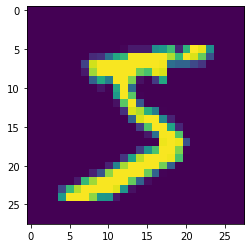

In [6]:
plt.imshow(x_train[0])
print(y_train[0])

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
x_train= x_train/255.0
x_test=x_test/255.0

In [10]:
x_train=x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [11]:
x_train[0].shape

(28, 28, 1)

In [12]:
input_shape = x_train[0].shape

# CNN Model

In [16]:
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [18]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history=model.fit(x_train,y_train, batch_size=128, epochs=10,verbose =1, validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1873 - accuracy: 0.9426 - val_loss: 0.0482 - val_accuracy: 0.9849
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0571 - accuracy: 0.9826 - val_loss: 0.0340 - val_accuracy: 0.9881
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0393 - accuracy: 0.9874 - val_loss: 0.0323 - val_accuracy: 0.9885
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0301 - accuracy: 0.9898 - val_loss: 0.0300 - val_accuracy: 0.9904
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0238 - accuracy: 0.9923 - val_loss: 0.0309 - val_accuracy: 0.9900
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0198 - accuracy: 0.9938 - val_loss: 0.0273 - val_accuracy: 0.9908
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0181 - accuracy: 0.9939 - val_loss: 0.0277 - val_accuracy: 0.9912

In [20]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0327 - accuracy: 0.9909


[0.03271098807454109, 0.9908999800682068]

In [21]:
def plot_learningCurve(history, epoch):
    # plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model_accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
    
    # Plot traning & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()

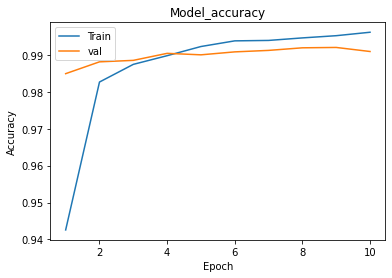

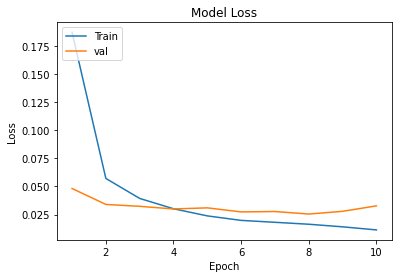

In [23]:
plot_learningCurve(history, 10)

# Inference

In [24]:
from tensorflow.keras.preprocessing import image

[[1.8394902e-15 1.9748654e-09 2.4414836e-11 8.1886069e-12 9.9970537e-01
  1.1597866e-08 1.2937928e-13 6.4566752e-09 1.5027282e-05 2.7953970e-04]]


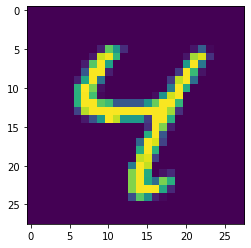

In [58]:
img = x_test[6]
plt.imshow(img)
img = img.reshape(1, 28, 28,1)
predict = model.predict(img)
print(predict)

In [56]:
import numpy as np
print(np.argmax(predict)

4


# Saving the model

In [59]:
model.save('mnist_2d_convNet.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mnist_2d_convNet.model/assets
